
# Assignment Jan 2017. Water company uses ASR system to prevent extraction from tiver during summer

:author: T.N.Olsthoorn, Jan 2017, updated Jun 2022

## Problem statement

A water company extracts water from a small river to treat and distribute it as drinking water for the population of a small town nearby. This is not a problem in winter. However, due to growing demand for drinking water and growing environmental concern, extraction has become more and more problematic during summers when the discharge of this small river is at its lowest. The environmental agency has recently even forbidden to further extract water from the river during the summer months.

![Situation sketch](../LyX/pictures/AssJan2018_1.png)

In order to solve the problem that this causes for the drinking water supply, the drinking water company has suggested an "Aquifer Storage and Recovery" system (these so-called ASR systems are becoming more and more popular). It wants to take in more river water during winter and inject it through a well (or wells) at some distance from the river into the local water-table aquifer, so that this water can be extracted during the next summer. This way, no water-intake will be necessary during the summer months.

The debate that took off between the water company and the environmental agency focuses on whether, or to what extent, this ASR system could really makes sense, i.e. could really prevent infiltratioin from the river during the summer season. The question to be aswered is this: Can you really store the water in winter and extract it during summer without substantially affecting the already low summer-discharge of the river? Will not much of the stored water flow back to the river through the aquifer during winter? And would the extraction not induce an infiltration from the river into the aquifer during summer, so that there is still a water intake, the only differece now being that it will be invisible?

It's your task as hydrologist of the environmental agency to answer this question and illustrate it quantitatively and also explain it clearly. Your explanation should include why and how you derived your answer. It should show the math and the code.

It is obvious that ASR will work if the distance between the well and the river is large enough. But how large is large enough, and on what does it depend? The water company suggested a distance of 500 m from the river. Should the environmental agency agree?

#### Hints and further information:

1. To analyse this system, at least coarsely, simplify the injection and extraction regime and apply superposition. Superposition allows to only consider the well and treat the river as a fixed-head boundary using a mirror well. Simplify the river to a straight line along the y-axis and place the well at distance $x_w$ from this line at coordinate $(x_w, 0)$. That is, the x-axis is perpendicular to the river.

2. The drinking water demand, $Q$, is considered constant year-round at 150 L/d per inhabitant for the 10000 inhabitants of the town.

3. Assume the following injection and recovery regime:
   
   1. The water company well extracts during 3 summer months (June, July, Aug) its full demand

   2. It compensates that during 6 winter months (October-March) by injecting half its daily capacity.
   
   3. There is neither injection nor extraction during the months April, May and September.

4. The idea is to analyse this ASR system by computing the exchange between the aquifer and the river due to the well.

5. When you have coded the problem for this particular distance of 500 m, experiment with this distance to come up with a distance that realy makes sense in terms of not inducing loss of river water during the summer months. That is, try 1000 and 2000 m.

6. Use kD = 900 m2/d, S = 0.2

### Steps to take:

1. Use Theis' well function to compute drawdowns:

    $$ s(t, t) =\frac  Q {4 \pi kD} W(u), \,\,\,\,\ W(u) =  -scipy.special.expi(-u),\,\,\,\,\, u \frac {r^2 S} {4 kD t} $$

1. From Theis' well function

    $$ W(u) = \intop_u^\infty \frac {e^{-y}} y dy $$

    derive the flow $Q(r, t)$ [L3/T] and the specific discharge $q(r,t)$ [L2/T] in the aquifer at distance $r$ from the well.

1. To simulate the river, apply a mirror well.

1. Compute the exchange between aquifer and river, derive the specific discharge $q$ [L2/T] perpendicular to the river at an arbitrary point $y$.

1. Compute this specific discharge for a large number of points between $-a x_w<y<a x_w$, where $a$ is sufficiently large, thus covering a large enough track of the river to capture about the full induced exchange between aquifer and the river.

    Generating appropriate y-coordinates this way, can be done as follows:

    `y = np.hstack(( -np.logspace(0, np.log10(a * xw), Np)[::-1], np.logspace(0, np.log10(a * xw), Np))`

    Where $a$ may be taken 10 and $Np$ 500 for example.

1. Numerically integrate this specific discharge along the river to obtain the total exchange between river and aquifer.    
    >Numerical integration is easy when uing the Simpson rule (trapezium rule).

1. Having the code to do this for a single time, it can readily be extended for a large number of times.
1. Check that for large times, the total flow between aquifer and river should be about the total discharge of the well if the well is continuously injecting.

1. Finally simulate the actual flow regime with 6 month injection and 3 months extraction as explained above. Simulate for a period of 5 years. This simulation requires superposition in time.

### Suggestions:

1. It's probably easiest to analyze everything in time units of months instead of days, 5 years time then runs from 0 to 60 months.
1. Learn to define and use functions in Python to keep overview and prevent repeating code.
2. If you consider this too complicated, then anlyse at least the situation for only the river point closest to the well.
3. Start by plotting the head.
4. When this works focus on the discharge.
1. Don't hesitate to ask questions and for help.


In [66]:
# import the necessary fucntionality
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as W # Theis well function

def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None, xscale=None, yscale=None, figsize=(10, 8),
            fontsize=16):
    sizes = ['xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large']
    
    assert isinstance(fontsize, int) or fontsize in sizes, \
        "fontsize not int and not in [{}]".format(', '.join(sizes))
                
    _, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    ax.grid()
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)
    return ax

def newfigs(layout, titles=['?'], xlabels=['?'], ylabels=['?'], xscales=None, yscales=None,
            xlim=None, ylim=None, sharex=None, sharey=None, fontsize=16, figsize=(10, 8)):
    sizes = ['xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large']
    
    assert isinstance(fontsize, int) or fontsize in sizes, \
        "fontsize not int and not in [{}]".format(', '.join(sizes))
                
    fig, axs = plt.subplots(*layout, sharex=sharex, sharey=sharey)
    fig.set_size_inches(figsize)

    assert isinstance(layout, tuple) and len(layout) == 2, 'layout must be a 2-tuple (nrows, ncols) not {}'.format(str(layout))
    n_axes = np.prod(layout)
    
    if xscales is None: xscales = [None for _ in range(n_axes)]
    if yscales is None: yscales = [None for _ in range(n_axes)]
        
    for items_name, items in zip(['titles', 'xlabels', 'ylabels', 'xscales', 'yscales'], [titles, xlabels, ylabels, xscales, yscales]):
        assert len(items) == np.prod(layout), 'len({}) == {} != len(layout) == {}'.format(items_name, len(items), len(np.prod(layout)))
        
    for ax, title, xlabel, ylabel, xscale, yscale in zip(axs, titles, xlabels, ylabels, xscales, yscales):        
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        if xlim: ax.set_xlim(xlim)
        if ylim: ax.set_ylim(ylim)
        if xscale: ax.set_xscale(xscale)
        if yscale: ax.set_yscale(yscale)
        ax.grid()
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fontsize)
    return axs

In [49]:
[None for k in range(5)]

[None, None, None, None, None]

Because the river is regarded as a straight fixed-head boundary along the y-axis at x=0, it can be simulated using a well and a mirror wel. The well is at `(-xw, 0)` and the mirror well ast `(xw, 0)

In [195]:
# aquifer
kD, S, Qd = 900., 0.2, 0.15 * 1000 # m2/d, (-), m3/d

show_times = [10, 30, 60, 120, 240, 480, 1060, 2120, 4240]

# Coordinates
L = 500.
wells = {1: {'x':+L, 'y':0., 'Q':-Qd},
         2: {'x':-L, 'y':0., 'Q':+Qd}
}

a  = 25.

# First show the heads and the specific discharge to gain overview

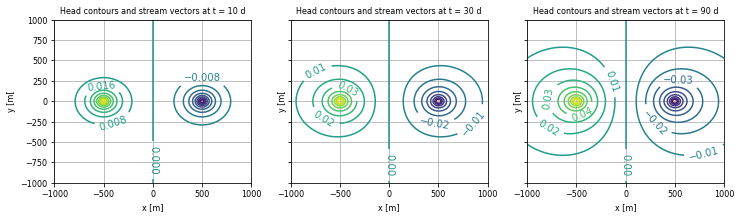

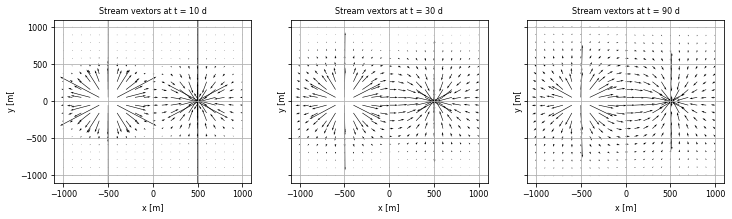

In [196]:
N, a = 100, 2.
x = np.linspace(-a * L, a * L, N + 1)
y = np.linspace(-a * L, a * L, N + 1)
X, Y = np.meshgrid(x, y)

show_times = [10, 30, 90]

titles = [f'Head contours and stream vectors at t = {t:.0f} d' for t in show_times]
xlabels = ['x [m]' for _ in show_times]
ylabels = ['y [m[' for _ in show_times]

axs = newfigs((1, 3), titles, xlabels, ylabels, sharex=True, sharey=True, figsize=(12, 3), fontsize=8)

for ax, t in zip(axs.ravel(), show_times):
    s = np.zeros_like(X)
    for k in wells:        
        well = wells[k]
        r2 = (X - well['x']) ** 2 + (Y - well['y']) ** 2
        u = r2 * S / (4 * kD * t)
        s += well['Q'] / (4 * np.pi * kD) * W(u)
    cs = ax.contour(X, Y, s, levels=20)
    ax.clabel(cs)
    
plt.show()

# Quiver plot to show the flow field
titles = [f'Stream vextors at t = {t:.0f} d' for t in show_times]
axs = newfigs((1, 3), titles, xlabels, ylabels, sharex=True, sharey=True, figsize=(12, 3), fontsize=8)

xq = np.linspace(-1000, 1000, 21)
yq = np.linspace(-1000, 1000, 20)
Xq, Yq = np.meshgrid(xq, yq)

for ax, t in zip(axs.ravel(), show_times):
    qx = np.zeros_like(Xq)
    qy = np.zeros_like(Yq)
    for k in wells:        
        well = wells[k]
        r2 = (Xq - well['x']) ** 2 + (Yq - well['y']) ** 2
        u = r2 * S / (4 * kD * t)
        qx += well['Q'] * np.exp(-u) * (Xq - well['x']) / r2
        qy += well['Q'] * np.exp(-u) * (Yq - well['y']) / r2
    ax.quiver(Xq, Yq, qx, qy)
    
plt.show()



## Compute the infiltration from the river if the extration were continuous after $t=0$

$$Q_{r,t} = Q_0 \, e^{-u}\text{, where }u=\frac{r^2 S}{4 kD t}$$ 

Hence,

$$q_{r,t} = \frac{Q_0}{2 \pi r} \, e^{-u}\text{, where }u=\frac{r^2 S}{4 kD t}$$

Separating out the components in x- and y-direction:
$$q_x(x, y,t) = \frac{Q_0}{2 \pi r} \, e^{-u} \cos(\alpha)$$
$$q_y(x, y,t) = \frac{Q_0}{2 \pi r} \, e^{-u} \sin(\alpha)$$

And, with $Q < 0$ meaning extration, the specific discharge due to a single well becomes
$$q_x(x, y,t) = -\frac{Q_0}{2 \pi} \frac{x - x_w}{r^2}\,e^{-u}$$
$$q_y(x, y,t) = -\frac{Q_0}{2 \pi} \frac{y - y_w}{r^2}\,e^{-u}$$

Let the river coincide with the y axis and x=0.

Then we generate points along the river where we'll comopute the exchange between river and aquifer.

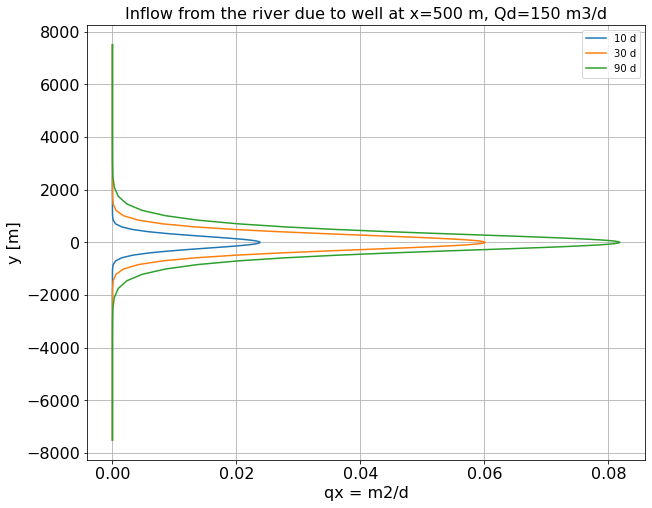

In [197]:
a = 15 # (-), a scale factor for y-coordinates, further no meaning.
Y = np.hstack(( -np.logspace(0, np.log10(a * L))[::-1],
                 np.logspace(0, np.log10(a * L))))
X = np.zeros_like(Y)

ax = newfig(f"Inflow from the river due to well at x={L:.0f} m, Qd={Qd:.0f} m3/d", "qx = m2/d", "y [m]")

for t in show_times:
    qx = np.zeros_like(Y)
    qy = np.zeros_like(Y)
    for k in wells:
        well = wells[k]    
        R2 = (X - well['x']) ** 2 + (Y - well['y']) ** 2
        u = R2 * S / (4 * kD * t)
        qx += well['Q'] / (2 * np.pi) * (X - well['x']) / R2 *  np.exp(-u)
        qy += well['Q'] / (2 * np.pi) * (Y - well['y']) / R2 *  np.exp(-u)
    
    ax.plot(qx, Y, label=f'{t:.0f} d')
ax.legend()

The next step is to integrate the flow along the river. We do that numerically. One can use the function quad() or just apply the Simpson rule by hand.

Using both quad and the hand method to compute:
$$ Q_{0,y} = \intop_{-\infty}^{+\infty} q_x dy $$

/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_26905/3237411529.py:13: RuntimeWarning: divide by zero encountered in true_divide
  u = R2 * S / (4 * kD * t)


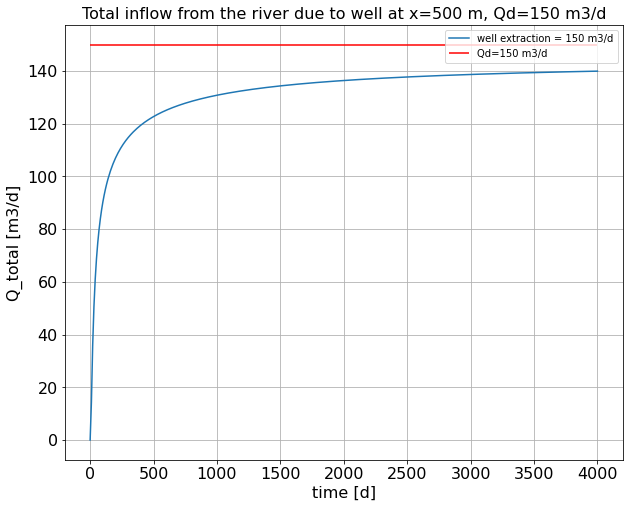

In [198]:
ax = newfig(f"Total inflow from the river due to well at x={L:.0f} m, Qd={Qd:.0f} m3/d", "time [d]", "Q_total [m3/d]")

dy = np.diff(Y)

times = np.arange(0, 4001, 10.)
Qrin = np.zeros_like(times)
for it, t in enumerate(times):
    qx = np.zeros_like(Y)
    qy = np.zeros_like(Y)
    for k in wells:
        well = wells[k]    
        R2 = (X - well['x']) ** 2 + (Y - well['y']) ** 2
        u = R2 * S / (4 * kD * t)
        qx += well['Q'] / (2 * np.pi) * (X - well['x']) / R2 *  np.exp(-u)
        qy += well['Q'] / (2 * np.pi) * (Y - well['y']) / R2 *  np.exp(-u)
    Qrin[it] = np.sum(0.5 * (qx[:-1] + qx[1:]) * dy)
    
ax.plot(times, Qrin, label=f'well extraction = {Qd:.0f} m3/d')
ax.hlines([Qd], xmin=0., xmax=times[-1], colors=['r'], label=f'Qd={Qd:.0f} m3/d')
ax.legend()

## Simulating the actual flow regime, with winter injection and summer extraction.

1. The infiltration into the aquifer is -0.5Q from Oct to Mar, i.e during 6 month every year.
2. The groundwater extraction is equals $Q$ from Jun to Aug, .e. during 3 months every year.

We may set up a monthly regime, telling the fraction of the total drinking water capacity that is extracted (negative values) or injected (just positive values) every month.

The regime is repeated 5 times to cover the required simulation period of 5 years.

### Set up the regime

In [239]:
Ny = 5 # Number of simulation years

regime = dict() # Hold the regime (startdates and corresponding flow of the well)

yyyy = np.ones((12, 1), dtype=int) * np.arange(2018, 2024, dtype=int)[np.newaxis, :]
mm = np.arange(1, 13, dtype=int)[:, np.newaxis] * np.ones((1, Ny),  dtype=int)
regime['dates'] = np.array([np.datetime64(f'{y:04d}-{m:02d}-01') for y, m in zip(yyyy.T.ravel(), mm.T.ravel())])
regime['Qw'] = wells[1]['Q'] * np.array(Ny * [-0.5, -0.5, -0.5,   0,   0,   1,   1,   1,  0, -0.5, -0.5, -0.5])  # m3/d in each month

# Let's set dQ separtely for well and mirror
regime['dQw'] = np.diff(np.hstack((0., regime['Qw'])))  # The chage of flow every month needed for superpostioin.
regime

# We may filter out only the months when the regime change differs from zero
for k in regime.keys():
    regime[k] = regime[k][regime['dQw'] != 0]
regime

{'dates': array(['2018-01-01', '2018-04-01', '2018-06-01', '2018-09-01',
        '2018-10-01', '2019-04-01', '2019-06-01', '2019-09-01',
        '2019-10-01', '2020-04-01', '2020-06-01', '2020-09-01',
        '2020-10-01', '2021-04-01', '2021-06-01', '2021-09-01',
        '2021-10-01', '2022-04-01', '2022-06-01', '2022-09-01',
        '2022-10-01'], dtype='datetime64[D]'),
 'Qw': array([  75.,   -0., -150.,   -0.,   75.,   -0., -150.,   -0.,   75.,
          -0., -150.,   -0.,   75.,   -0., -150.,   -0.,   75.,   -0.,
        -150.,   -0.,   75.]),
 'dQw': array([  75.,  -75., -150.,  150.,   75.,  -75., -150.,  150.,   75.,
         -75., -150.,  150.,   75.,  -75., -150.,  150.,   75.,  -75.,
        -150.,  150.,   75.])}

In [200]:
# Simulation ties as true dates over the simulation period (days)
tsim = np.arange(regime['dates'][0], np.datetime64(f'{yyyy[0, -1] + 1:04d}-01-01'))
tsim

array(['2018-01-01', '2018-01-02', '2018-01-03', ..., '2023-12-29',
       '2023-12-30', '2023-12-31'], dtype='datetime64[D]')

Now simulate the pumping regime by superposition

Flow changes need to be suerimposed:

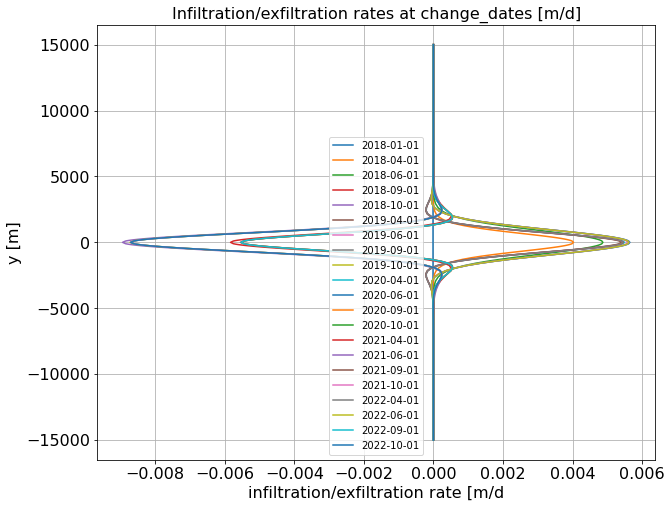

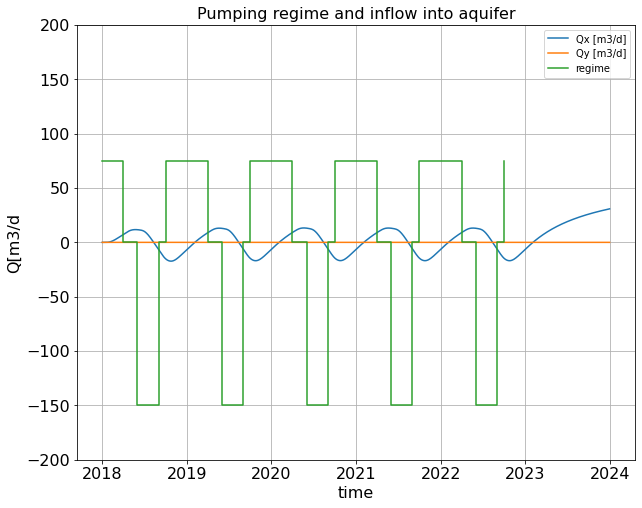

In [256]:
# Carry out superposition in time

# Coordinates
L = 1500.
wells = {1: {'x':+L, 'y':0., 'Q':-Qd},
         2: {'x':-L, 'y':0., 'Q':+Qd}
}

a = 10
yy = np.logspace(2, np.log10(L * a), 50)

Yr = np.hstack((-yy[::-1], 0, yy))[:, np.newaxis]
Xr = np.zeros_like(Yr)
qx = np.zeros((len(Yr), len(tsim)))
qy = np.zeros((len(Yr), len(tsim)))

for dQw, change_date in zip(regime['dQw'], regime['dates']):
    t = (tsim[tsim > change_date] - change_date) / np.timedelta64(1, 'D')
    for k in wells:
        well = wells[k]
        dx_, dy_ = Xr - well['x'], Yr - well['y']
        r2 = dx_ ** 2 + dy_ ** 2
        u = r2 * S / (4 * kD * t) # (ny x nt)
        sign = well['Q'] / abs(well['Q']) # Make  sure the sign for the mirror well is reversed, its -dQw
        qx[:, tsim > change_date] += sign * dQw / (2 * np.pi) * np.exp(-u) * dx_ / r2
        qy[:, tsim > change_date] += sign * dQw / (2 * np.pi) * np.exp(-u) * dy_ / r2
Qx = np.sum(0.5 * (qx[:-1, :] + qx[1:, :]) * np.diff(Yr, axis=0), axis=0)
Qy = np.sum(0.5 * (qy[:-1, :] + qy[1:, :]) * np.diff(Yr, axis=0), axis=0)

ax = newfig("Infiltration/exfiltration rates at change_dates [m/d]", "infiltration/exfiltration rate [m/d", "y [m]")
for change_date in regime['dates']:
    it = np.sum(tsim <= change_date)
    ax.plot(qx[:, it], Yr, label=str(change_date))
ax.legend()
plt.show()

ax = newfig("Pumping regime and inflow into aquifer", "time", "Q[m3/d")
ax.plot(tsim, Qx, label='Qx [m3/d]')
ax.plot(tsim, Qy, label='Qy [m3/d]')
ax.step(regime['dates'], regime['Qw'], where='post', label='regime')
ax.set_ylim((-200, 200))
ax.legend()
plt.show()


### Conclusion

By increasing the distance $L$ between the well and the river, the infiltraion during summer can be fully prevented. You figure out which distance this is.

The goal is fully achieved when the distance of the well from the river is 1500 of more.